# Results as a Function of max_tau

## Imports and Data Loading

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from performance_profile import compute_performance_profiles
from plotting_utils import PLOT_STYLE, read_data_from_logs
from score_submissions import compute_leaderboard_score
from tueplots import bundles, figsizes

/home/frank/anaconda3/envs/algoperf_pt/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
SELF_TUING = False

log_path = "../../submissions_algorithms_v0.5/logs/algoperf_scoring_v05/"
if SELF_TUING:
  log_path = os.path.join(log_path, "self_tuning")
else:
  log_path = os.path.join(log_path, "external_tuning")

full_results = read_data_from_logs(log_path)

# Remove potential "fake" submissions from other rulesets
# that we did not compute, but reused:
try:
  del full_results["prize_qualification_baseline_self"]
  del full_results["prize_qualification_baseline_ext"]
  del full_results["schedule_free_adamw_self"]
  del full_results["schedule_free_adamw_ext"]
  full_results["schedule_free_adamw"] = full_results.pop(
      "schedule_free_adamw_ext")
except KeyError:
  pass

Reading data for submission: shampoo_submission
['ogbg_pytorch', 'librispeech_conformer_pytorch', 'fastmri_tanh_pytorch', 'ogbg_model_size_pytorch', 'criteo1tb_pytorch', 'librispeech_conformer_layernorm_pytorch', 'imagenet_vit_pytorch', 'wmt_pytorch', 'librispeech_deepspeech_pytorch', 'imagenet_resnet_pytorch', 'criteo1tb_embed_init_pytorch', 'fastmri_pytorch', 'imagenet_resnet_large_bn_init_pytorch', 'wmt_glu_tanh_pytorch']
['ogbg_pytorch', 'librispeech_conformer_pytorch', 'fastmri_tanh_pytorch', 'ogbg_model_size_pytorch', 'criteo1tb_pytorch', 'librispeech_conformer_layernorm_pytorch', 'imagenet_vit_pytorch', 'wmt_pytorch', 'librispeech_deepspeech_pytorch', 'imagenet_resnet_pytorch', 'criteo1tb_embed_init_pytorch', 'fastmri_pytorch', 'imagenet_resnet_large_bn_init_pytorch', 'wmt_glu_tanh_pytorch']
['ogbg_pytorch', 'librispeech_conformer_pytorch', 'fastmri_tanh_pytorch', 'ogbg_model_size_pytorch', 'criteo1tb_pytorch', 'librispeech_conformer_layernorm_pytorch', 'imagenet_vit_pytorch', '

## Compute Scores for Different max_tau

In [6]:
# Create a DataFrame to store the scores for each max_tau
max_tau_scores = pd.DataFrame()

# Define the range of max_tau values to evaluate
max_taus = np.linspace(1.5, 4.0, 10)

# Compute the performance profile for each max_tau
for max_tau in max_taus:
  performance_profile_df = compute_performance_profiles(
      full_results,
      time_col='score',
      min_tau=1.0,
      max_tau=max_tau,
      reference_submission_tag=None,
      num_points=100,
      scale='linear',
      verbosity=0,
      self_tuning_ruleset=SELF_TUING,
      strict=False)
  scores = compute_leaderboard_score(performance_profile_df)
  # Add the scores to the DataFrame
  max_tau_scores[max_tau] = scores

# Sort by last column and transpose
max_tau_scores = max_tau_scores.sort_values(
    by=max_tau_scores.columns[-1], ascending=False).T

## Plot Scores as Function of max_tau

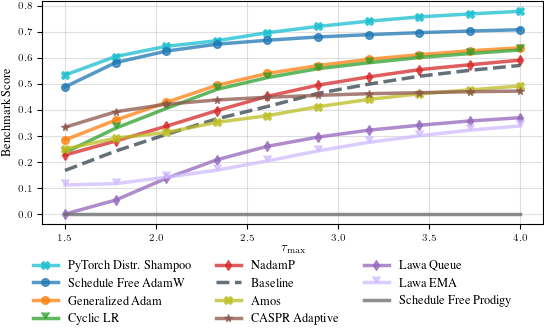

In [8]:
# Make a lineplot for all submmissions for the scores as function of max_tau
with plt.rc_context(
    {**bundles.iclr2024(), **figsizes.iclr2024(height_to_width_ratio=1.25)}):
  fig, ax = plt.subplots()
  for row in max_tau_scores.T.iterrows():
    submission = row[0]

    ax.plot(
        max_tau_scores.index,
        max_tau_scores[submission],
        color=PLOT_STYLE[submission]["color"],
        label=PLOT_STYLE[submission]["label"],
        linestyle=PLOT_STYLE[submission]["linestyle"],
        linewidth=2.5,
        alpha=0.75,
        marker=PLOT_STYLE[submission]["marker"],
        markersize=5.5,
    )

  ax.set_xlabel(r"$\tau_{\mathrm{max}}$", labelpad=0)
  ax.set_ylabel("Benchmark Score")
  # ax.legend(fontsize=9)
  fig.legend(loc='outside lower center', fontsize=9, ncol=3, frameon=False)

  filename = "plots/scores_max_tau"
  filename += "_self_tuning" if SELF_TUING else "_external_tuning"

  plt.savefig(f"{filename}.pdf")
  plt.show()
